In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('/home/atif/dataset_26_april_3.csv')
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]
univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')
univariate_data=univariate_data.loc[::-1]

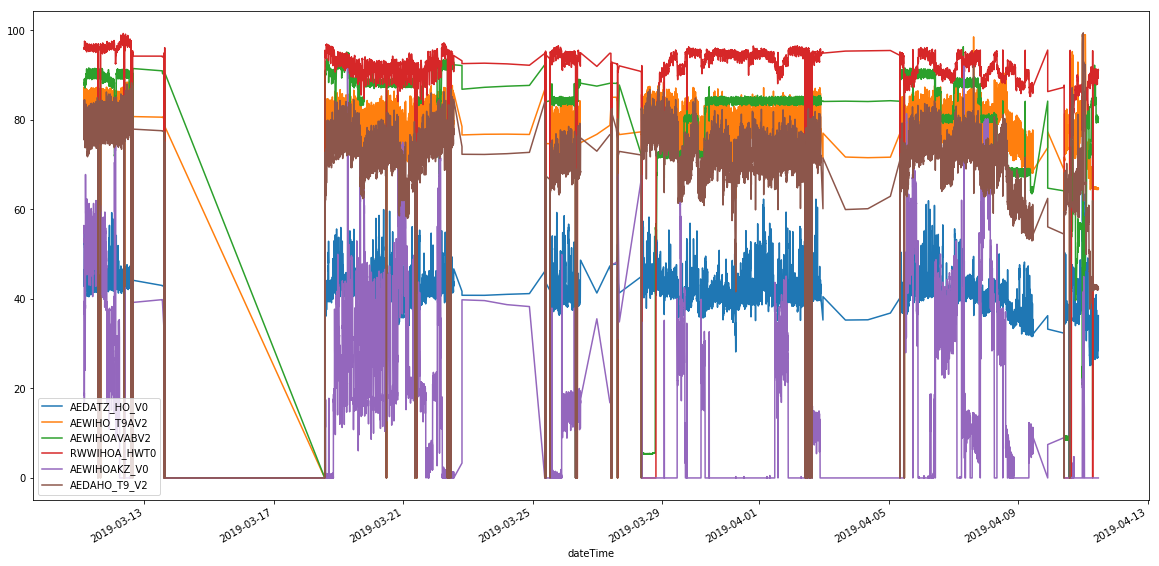

In [8]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from multivariate dataset

In [9]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 6)
shape of multivariate_data_drop_zero:  (13212, 6)


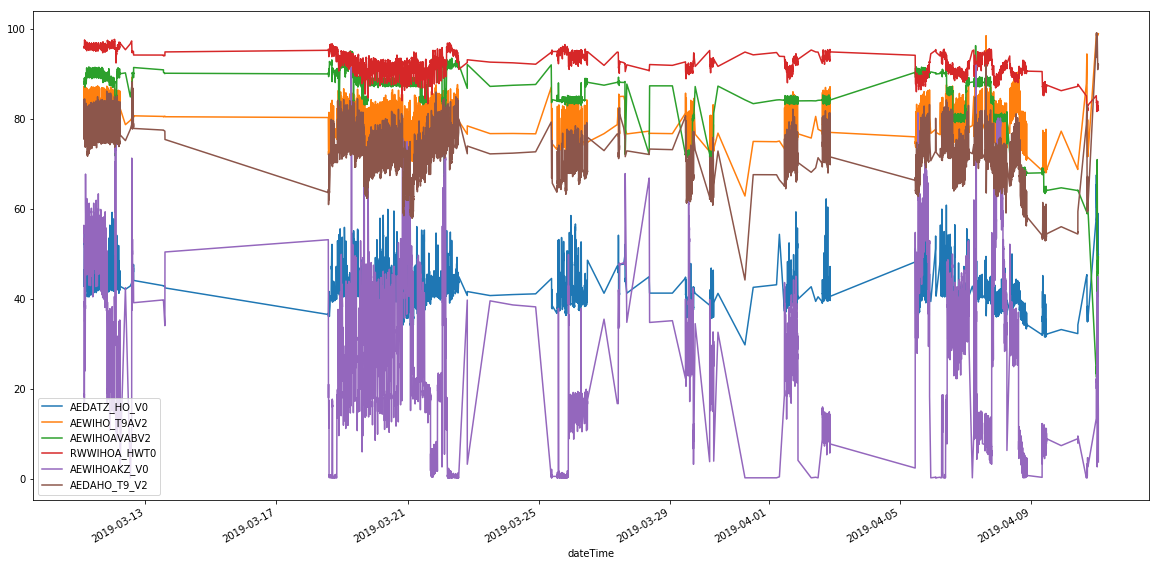

In [10]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

shape of univariate_data:  (24500, 1)


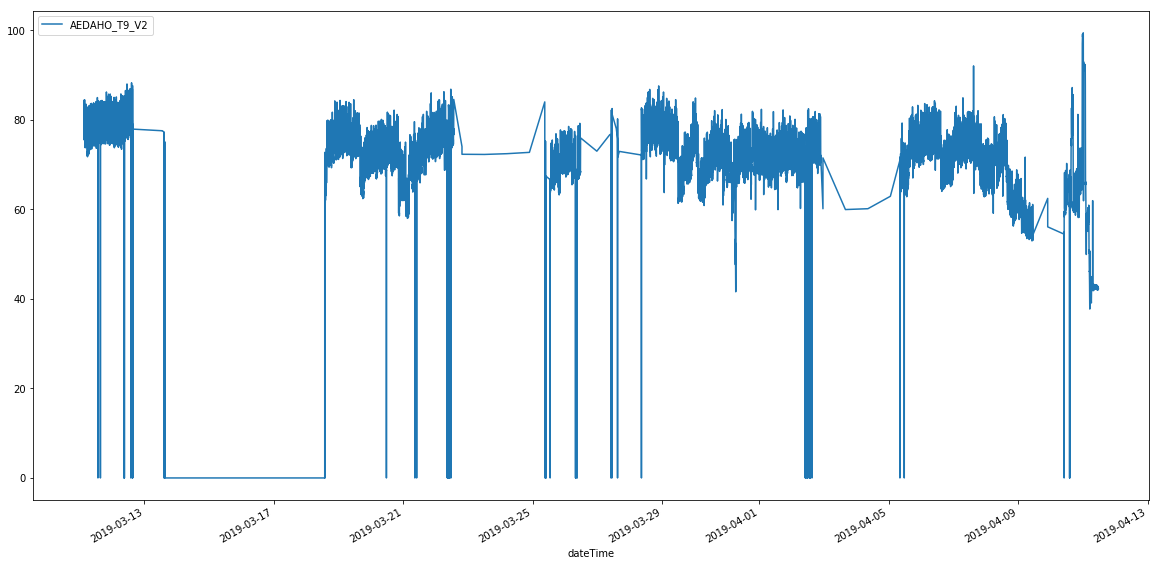

In [11]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from univariate dataset

In [12]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

shape of univariate_data:  (24500, 1)
shape of univariate_data_drop_zero:  (24410, 1)


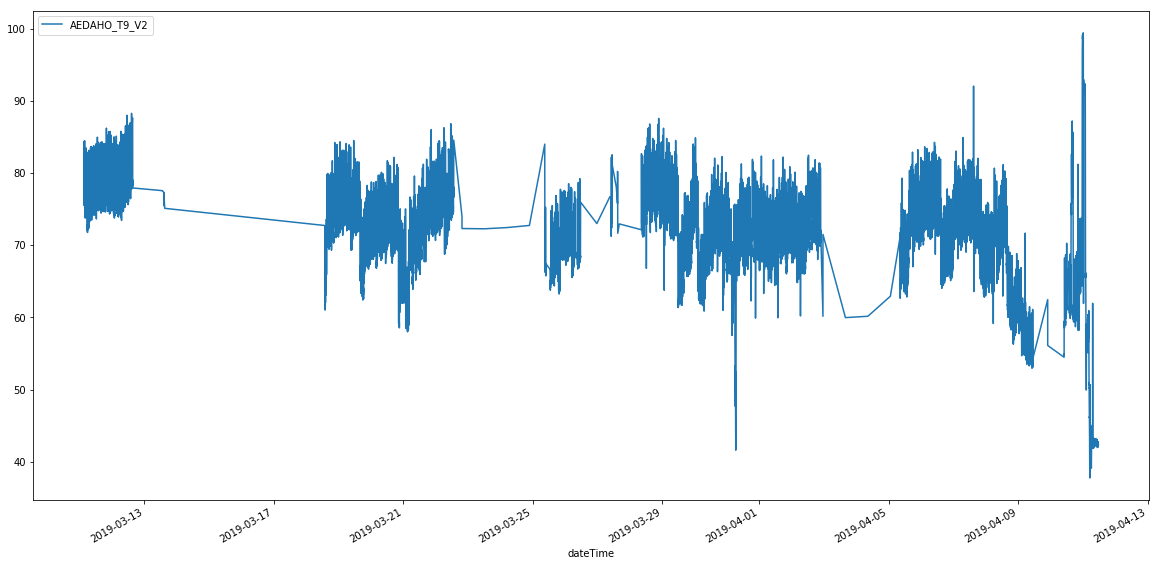

In [13]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [18]:
null_columns_multivariate=multivariate_data.columns[multivariate_data.isnull().any()]
multivariate_data[null_columns_multivariate].isnull().sum()

Series([], dtype: float64)

In [19]:
null_columns_univariate=univariate_data.columns[univariate_data.isnull().any()]
univariate_data[null_columns_univariate].isnull().sum()

Series([], dtype: float64)

In [14]:
# a=[1,2,3,4]
# b=[1,2]
# c=[1,2,3,4,5,6]

# d=[a,b,c]

# maxlen=max(map(len,d))
# print(maxlen)

In [15]:
# for i in d:
#     if len(i)<maxlen:
#         i.extend(0 for _ in range(maxlen-len(i)))

In [16]:
# print(d)

In [20]:
# multivariate_data.loc[multivariate_data['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
#                                           'AEWIHOAKZ_V0','AEDAHO_T9_V2']==0]

In [21]:
univariate_data[['AEDAHO_T9_V2']].idxmin()

AEDAHO_T9_V2   2019-03-11 13:43:00
dtype: datetime64[ns]

In [20]:
univariate_data.describe()

AEDAHO_T9_V2
count  24500.000000
mean      69.896877
std        8.144866
min        0.000000
25%       67.082395
50%       70.707651
75%       74.210937
max       99.451639

In [21]:
multivariate_data.describe()

AEDATZ_HO_V0  AEWIHO_T9AV2  AEWIHOAVABV2  RWWIHOA_HWT0  AEWIHOAKZ_V0  \
count  24500.000000  24500.000000  24500.000000  24500.000000  24500.000000   
mean      41.615423     76.911482     79.975928     88.588305     17.272872   
std        5.526882      6.223244     17.490315     19.479071     20.772134   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       38.941772     75.140305     80.190114     90.488923      0.000000   
50%       41.088972     76.825217     84.254694     93.155966      7.700092   
75%       43.898990     78.395621     88.314583     95.072678     32.602018   
max       67.611019     99.037058     96.347428     99.308017     92.032283   

       AEDAHO_T9_V2  
count  24500.000000  
mean      69.896877  
std        8.144866  
min        0.000000  
25%       67.082395  
50%       70.707651  
75%       74.210937  
max       99.451639

In [15]:
uni_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,uni_mean)
multi_mean=multivariate_data.mean()
multivariate_data_mean=multivariate_data.replace(0,multi_mean)

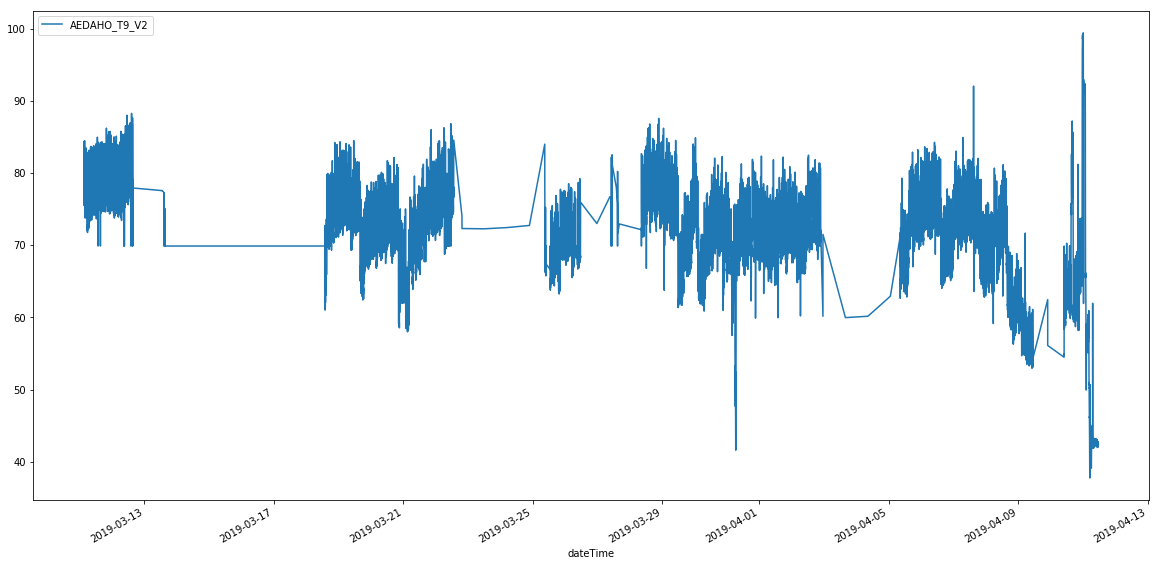

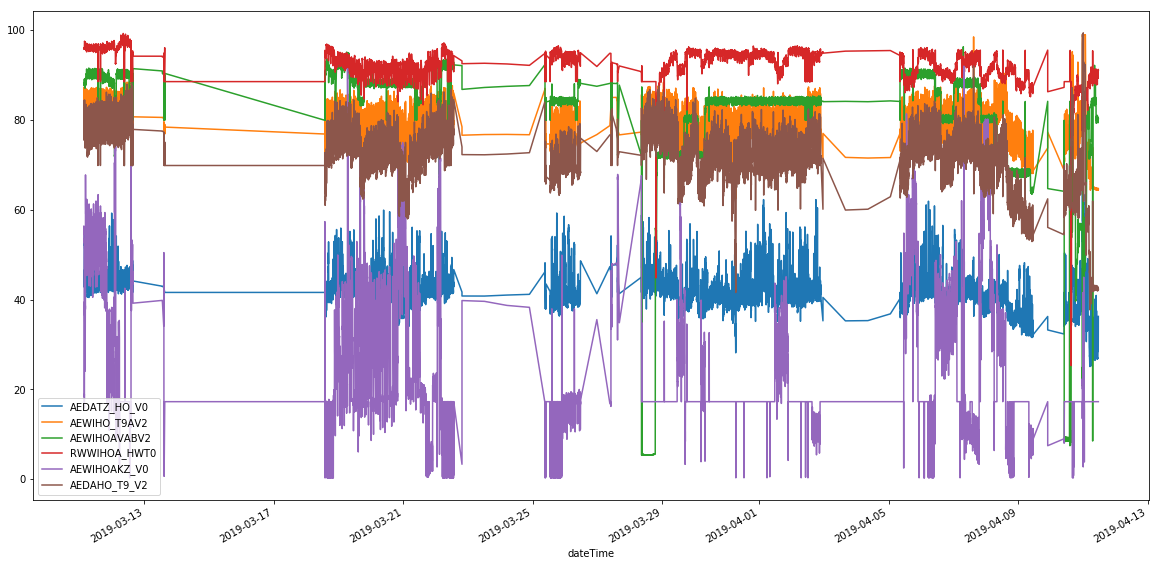

In [16]:
univariate_data_mean.plot()
multivariate_data_mean.plot()
plt.show()

In [23]:
univariate_data_mean.loc[univariate_data_mean['AEDAHO_T9_V2']==0]
# print(univariate_data)

Empty DataFrame
Columns: [AEDAHO_T9_V2]
Index: []

# find max value from each column

In [9]:
# finding max value from each column
max_val_array=[]
for idx,val in enumerate(list(test.columns)):
    x=test[val].max()
    q=[val,x]
    max_val_array.append(q)
max_val_array=np.array(max_val_array)
for i in max_val_array:
    print(i)

['row ID' 'Row9999']
['longTime' '1555311120000']
['AEAGHOAWE2T1' '98.67343689926952']
['AEAGHOAWE2A0' '100.0']
['AEAGHOAWE2T0' '98.68047251105995']
['AEAGHOAWE1A0' '100.0']
['AEAGHOAWE1T1' '95.32436459606436']
['AEAGHOAWE1T0' '71.79520644194703']
['AEAGHOAWE3T0' '99.32869318959595']
['AEAGHOAWE3A0' '100.0']
['AEAGHOAWE3T1' '95.40444935956188']
['AEAGHOAWE_A2' '100.0']
['AEAGHOAWE_A1' '100.0']
['AEAGHOAWE_A0' '97.79370330347851']
['AEAGHOAWE_T3' '89.41684665226782']
['AEAGTHHPF2T0' '98.90628952682538']
['AEAGHOA_S2G0' '0.27899650081395344']
['AEAGHOAWE_T2' '94.91172570223551']
['AEAGHOAWE_T1' '97.35716108565063']
['AEAGHOB_GHA0' '94.87926780568053']
['AEAGHOB_GHT0' '97.93192589401121']
['AEAGHOBWE2T0' '99.12758236943931']
['AEAGHOBWE2A0' '100.0']
['AEAGHOBWE2T2' '100.0']
['AEAGHOBWE1T0' '98.249156936261']
['AEAGHOBWE1T2' '100.0']
['AEAGHOBWE1A0' '100.0']
['AEAGHOBWE3T0' '99.25435756395004']
['AEAGHOBWE3T2' '100.0']
['AEAGHOBWE3A0' '100.0']
['AEAGHOBWE_T1' '100.0']
['AEAGHOBWE_T2' '100.

['DEKOSG_SSSG1' '100.0']
['DEKOSG_SSAG1' '0.0']
['DEKOSG_SAUG2' '89.55223880597015']
['DEKOSG_SSVG2' '100.0']
['DEKOSG_SAUG1' '89.55223880597015']
['DEKOSG_SSVG1' '100.0']
['DEKOSG_SSZG1' '100.0']
['DEKOSG_SSEG1' '0.0']
['DEKOSG_DRMG2' '100.0']
['DEKOSG_DRZG2' '89.55223880597015']
['DEKOSG_DRAG2' '100.0']
['DEKOSG___EG2' '100.0']
['DEKOSG___SG2' '100.0']
['DEKOSG___VG2' '100.0']
['DEKOSG___AG2' '89.55223880597015']
['DEKOSG___BG2' '96.77419354838707']
['DEKOSG__VWG2' '100.0']
['DEKOSG_DRMG1' '100.0']
['DEKOSG_DRAG1' '0.0']
['DEKOSG_DRZG1' '89.55223880597015']
['DEKOSG___SG1' '0.0']
['DEKOSG___EG1' '0.0']
['DEKOSG___AG1' '89.55223880597015']
['DEKOSG___VG1' '100.0']
['DEKOSG__VWG1' '0.0']
['DEKOSG___BG1' '100.0']
['DEKOSGRLCOA0' '100.0']
['DEKOSGRLCOA2' '100.0']
['DEKOSGRLCOA1' '100.0']
['DEKOSG___2P0' '0.0']
['DEKOSG___1P0' '0.0']
['DEKOSG____V0' '95.0']
['RWKOAUSSP_Q0' '90.88405074191813']
['RWKOGSOWEGS0' '89.4869171096343']
['AEKOKWA___V0' '95.56882873506882']
['AEKOKWA___G0' '99.788

# find the index where the column value is zero

In [19]:
for idx,val in enumerate(list(multivariate_data.columns)):
    count=1
    for i, j in multivariate_data.iterrows():
        for k in j:
            if k==0:
                count+=1
                print(i,'\t\t',k)
#     print(val,'\t\t',count)


AEDATZ_HO_V0 		 12680
AEWIHO_T9AV2 		 12680
AEWIHOAVABV2 		 12680
RWWIHOA_HWT0 		 12680
AEWIHOAKZ_V0 		 12680
AEDAHO_T9_V2 		 12680


In [50]:
for idx, val in enumerate(list(multivariate_data.columns)):
    print('-------------------------------------val:------------------------------------- ',val)
    count=0
    print('\nnow count: ',count)
    x=multivariate_data[val]
    print(val)
    for a in x:
        if a==0:
            count+=1
#             print('count here: ',count)
            

-------------------------------------val:-------------------------------------  AEDATZ_HO_V0

now count:  0
AEDATZ_HO_V0
-------------------------------------val:-------------------------------------  AEWIHO_T9AV2

now count:  0
AEWIHO_T9AV2
-------------------------------------val:-------------------------------------  AEWIHOAVABV2

now count:  0
AEWIHOAVABV2
-------------------------------------val:-------------------------------------  RWWIHOA_HWT0

now count:  0
RWWIHOA_HWT0
-------------------------------------val:-------------------------------------  AEWIHOAKZ_V0

now count:  0
AEWIHOAKZ_V0
-------------------------------------val:-------------------------------------  AEDAHO_T9_V2

now count:  0
AEDAHO_T9_V2


In [48]:
print(multivariate_data.shape)
print(multivariate_data_drop_zero.shape)

(24500, 6)
(13212, 6)


In [53]:
for x,y in multivariate_data.iterrows():
    print(y)

AEDATZ_HO_V0    46.119388
AEWIHO_T9AV2    79.178306
AEWIHOAVABV2    88.269769
RWWIHOA_HWT0    96.063659
AEWIHOAKZ_V0    54.778231
AEDAHO_T9_V2    83.327361
Name: 2019-03-11 03:14:00, dtype: float64
AEDATZ_HO_V0    46.534541
AEWIHO_T9AV2    81.659117
AEWIHOAVABV2    88.170360
RWWIHOA_HWT0    96.103362
AEWIHOAKZ_V0    54.704687
AEDAHO_T9_V2    84.314814
Name: 2019-03-11 03:15:00, dtype: float64
AEDATZ_HO_V0    46.555631
AEWIHO_T9AV2    86.055430
AEWIHOAVABV2    88.261385
RWWIHOA_HWT0    96.038536
AEWIHOAKZ_V0    56.415287
AEDAHO_T9_V2    84.380943
Name: 2019-03-11 03:16:00, dtype: float64
AEDATZ_HO_V0    45.940449
AEWIHO_T9AV2    87.113691
AEWIHOAVABV2    88.278552
RWWIHOA_HWT0    95.957508
AEWIHOAKZ_V0    55.230932
AEDAHO_T9_V2    83.279853
Name: 2019-03-11 03:17:00, dtype: float64
AEDATZ_HO_V0    44.218947
AEWIHO_T9AV2    87.266264
AEWIHOAVABV2    88.052587
RWWIHOA_HWT0    96.018279
AEWIHOAKZ_V0    53.037212
AEDAHO_T9_V2    79.963124
Name: 2019-03-11 03:18:00, dtype: float64
AEDATZ_HO_

Name: 2019-03-11 09:42:00, dtype: float64
AEDATZ_HO_V0    41.778014
AEWIHO_T9AV2    78.525544
AEWIHOAVABV2    89.920992
RWWIHOA_HWT0    95.801930
AEWIHOAKZ_V0    50.573659
AEDAHO_T9_V2    75.001572
Name: 2019-03-11 09:43:00, dtype: float64
AEDATZ_HO_V0    42.370922
AEWIHO_T9AV2    78.721216
AEWIHOAVABV2    89.883065
RWWIHOA_HWT0    95.739547
AEWIHOAKZ_V0    50.063343
AEDAHO_T9_V2    75.113530
Name: 2019-03-11 09:44:00, dtype: float64
AEDATZ_HO_V0    43.668803
AEWIHO_T9AV2    78.732226
AEWIHOAVABV2    90.130190
RWWIHOA_HWT0    95.734681
AEWIHOAKZ_V0    48.418409
AEDAHO_T9_V2    75.128678
Name: 2019-03-11 09:45:00, dtype: float64
AEDATZ_HO_V0    45.354768
AEWIHO_T9AV2    78.640682
AEWIHOAVABV2    90.921467
RWWIHOA_HWT0    95.592070
AEWIHOAKZ_V0    50.869971
AEDAHO_T9_V2    75.436947
Name: 2019-03-11 09:46:00, dtype: float64
AEDATZ_HO_V0    46.800846
AEWIHO_T9AV2    78.694476
AEWIHOAVABV2    91.458035
RWWIHOA_HWT0    95.672287
AEWIHOAKZ_V0    49.781523
AEDAHO_T9_V2    75.174771
Name: 2019

Name: 2019-03-11 17:01:00, dtype: float64
AEDATZ_HO_V0    42.068424
AEWIHO_T9AV2    78.554171
AEWIHOAVABV2    91.308722
RWWIHOA_HWT0    94.859573
AEWIHOAKZ_V0    43.173523
AEDAHO_T9_V2    74.803591
Name: 2019-03-11 17:02:00, dtype: float64
AEDATZ_HO_V0    42.123275
AEWIHO_T9AV2    78.663017
AEWIHOAVABV2    89.144486
RWWIHOA_HWT0    94.913055
AEWIHOAKZ_V0    43.665229
AEDAHO_T9_V2    74.919530
Name: 2019-03-11 17:03:00, dtype: float64
AEDATZ_HO_V0    42.220886
AEWIHO_T9AV2    78.404429
AEWIHOAVABV2    88.411896
RWWIHOA_HWT0    94.750998
AEWIHOAKZ_V0    40.328843
AEDAHO_T9_V2    75.005294
Name: 2019-03-11 17:04:00, dtype: float64
AEDATZ_HO_V0    42.265430
AEWIHO_T9AV2    78.297471
AEWIHOAVABV2    88.239827
RWWIHOA_HWT0    94.835271
AEWIHOAKZ_V0    44.407445
AEDAHO_T9_V2    74.816560
Name: 2019-03-11 17:05:00, dtype: float64
AEDATZ_HO_V0    42.327503
AEWIHO_T9AV2    78.484334
AEWIHOAVABV2    88.295320
RWWIHOA_HWT0    96.076617
AEWIHOAKZ_V0    50.384168
AEDAHO_T9_V2    74.921842
Name: 2019

Name: 2019-03-11 23:16:00, dtype: float64
AEDATZ_HO_V0    43.628408
AEWIHO_T9AV2    79.307600
AEWIHOAVABV2    88.211082
RWWIHOA_HWT0    96.258119
AEWIHOAKZ_V0    23.504477
AEDAHO_T9_V2    78.489575
Name: 2019-03-11 23:17:00, dtype: float64
AEDATZ_HO_V0    43.399475
AEWIHO_T9AV2    79.640116
AEWIHOAVABV2    88.280947
RWWIHOA_HWT0    96.302688
AEWIHOAKZ_V0    24.156509
AEDAHO_T9_V2    78.153321
Name: 2019-03-11 23:18:00, dtype: float64
AEDATZ_HO_V0    43.021049
AEWIHO_T9AV2    79.293444
AEWIHOAVABV2    88.191520
RWWIHOA_HWT0    96.404784
AEWIHOAKZ_V0    25.896633
AEDAHO_T9_V2    77.573889
Name: 2019-03-11 23:19:00, dtype: float64
AEDATZ_HO_V0    43.430218
AEWIHO_T9AV2    78.839499
AEWIHOAVABV2    88.115266
RWWIHOA_HWT0    96.367515
AEWIHOAKZ_V0    26.208693
AEDAHO_T9_V2    77.237248
Name: 2019-03-11 23:20:00, dtype: float64
AEDATZ_HO_V0    45.518012
AEWIHO_T9AV2    78.802064
AEWIHOAVABV2    88.154391
RWWIHOA_HWT0    96.472845
AEWIHOAKZ_V0    29.165741
AEDAHO_T9_V2    82.029710
Name: 2019

Name: 2019-03-12 04:57:00, dtype: float64
AEDATZ_HO_V0    43.812200
AEWIHO_T9AV2    77.702278
AEWIHOAVABV2    90.209237
RWWIHOA_HWT0    97.028697
AEWIHOAKZ_V0    33.128752
AEDAHO_T9_V2    74.156242
Name: 2019-03-12 04:58:00, dtype: float64
AEDATZ_HO_V0    47.381140
AEWIHO_T9AV2    77.862715
AEWIHOAVABV2    90.300662
RWWIHOA_HWT0    96.967114
AEWIHOAKZ_V0    32.272379
AEDAHO_T9_V2    79.304736
Name: 2019-03-12 04:59:00, dtype: float64
AEDATZ_HO_V0    48.234962
AEWIHO_T9AV2    77.981943
AEWIHOAVABV2    90.253153
RWWIHOA_HWT0    96.987372
AEWIHOAKZ_V0    33.071137
AEDAHO_T9_V2    81.570454
Name: 2019-03-12 05:00:00, dtype: float64
AEDATZ_HO_V0    48.531413
AEWIHO_T9AV2    82.750724
AEWIHOAVABV2    90.313437
RWWIHOA_HWT0    96.966303
AEWIHOAKZ_V0    32.982205
AEDAHO_T9_V2    83.028462
Name: 2019-03-12 05:01:00, dtype: float64
AEDATZ_HO_V0    47.579977
AEWIHO_T9AV2    85.115767
AEWIHOAVABV2    90.350166
RWWIHOA_HWT0    96.956580
AEWIHOAKZ_V0    32.963417
AEDAHO_T9_V2    83.159810
Name: 2019

Name: 2019-03-12 11:06:00, dtype: float64
AEDATZ_HO_V0    43.306067
AEWIHO_T9AV2    79.407324
AEWIHOAVABV2    90.233191
RWWIHOA_HWT0    96.956580
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.238017
Name: 2019-03-12 11:07:00, dtype: float64
AEDATZ_HO_V0    42.984323
AEWIHO_T9AV2    79.301309
AEWIHOAVABV2    90.165322
RWWIHOA_HWT0    96.680282
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.275896
Name: 2019-03-12 11:08:00, dtype: float64
AEDATZ_HO_V0    42.911408
AEWIHO_T9AV2    79.161948
AEWIHOAVABV2    90.159333
RWWIHOA_HWT0    97.126747
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.322243
Name: 2019-03-12 11:09:00, dtype: float64
AEDATZ_HO_V0    43.075304
AEWIHO_T9AV2    79.366742
AEWIHOAVABV2    90.160132
RWWIHOA_HWT0    97.399001
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.780471
Name: 2019-03-12 11:10:00, dtype: float64
AEDATZ_HO_V0    43.252462
AEWIHO_T9AV2    79.322700
AEWIHOAVABV2    90.164923
RWWIHOA_HWT0    97.461394
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.995526
Name: 2019

Name: 2019-03-18 15:48:00, dtype: float64
AEDATZ_HO_V0    39.824497
AEWIHO_T9AV2    76.054486
AEWIHOAVABV2    92.271270
RWWIHOA_HWT0    96.299444
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.625741
Name: 2019-03-18 15:49:00, dtype: float64
AEDATZ_HO_V0    39.794410
AEWIHO_T9AV2    75.939034
AEWIHOAVABV2    92.216975
RWWIHOA_HWT0    96.299444
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.783017
Name: 2019-03-18 15:50:00, dtype: float64
AEDATZ_HO_V0    39.901619
AEWIHO_T9AV2    75.824525
AEWIHOAVABV2    92.061673
RWWIHOA_HWT0    96.292965
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.591589
Name: 2019-03-18 15:51:00, dtype: float64
AEDATZ_HO_V0    40.105909
AEWIHO_T9AV2    75.766956
AEWIHOAVABV2    92.236138
RWWIHOA_HWT0    96.167368
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.456559
Name: 2019-03-18 15:52:00, dtype: float64
AEDATZ_HO_V0    40.011313
AEWIHO_T9AV2    75.727318
AEWIHOAVABV2    92.193819
RWWIHOA_HWT0    96.083105
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.249463
Name: 2019

Name: 2019-03-18 22:12:00, dtype: float64
AEDATZ_HO_V0    42.352855
AEWIHO_T9AV2    76.380395
AEWIHOAVABV2    83.960061
RWWIHOA_HWT0    92.126498
AEWIHOAKZ_V0    24.648216
AEDAHO_T9_V2    73.103561
Name: 2019-03-18 22:13:00, dtype: float64
AEDATZ_HO_V0    43.332602
AEWIHO_T9AV2    76.378822
AEWIHOAVABV2    85.031998
RWWIHOA_HWT0    92.203480
AEWIHOAKZ_V0    23.067164
AEDAHO_T9_V2    73.720353
Name: 2019-03-18 22:14:00, dtype: float64
AEDATZ_HO_V0    43.929125
AEWIHO_T9AV2    76.442997
AEWIHOAVABV2    85.753011
RWWIHOA_HWT0    92.005767
AEWIHOAKZ_V0    22.311530
AEDAHO_T9_V2    73.041424
Name: 2019-03-18 22:15:00, dtype: float64
AEDATZ_HO_V0    44.596722
AEWIHO_T9AV2    77.159305
AEWIHOAVABV2    86.838523
RWWIHOA_HWT0    91.687332
AEWIHOAKZ_V0    20.758748
AEDAHO_T9_V2    72.974271
Name: 2019-03-18 22:16:00, dtype: float64
AEDATZ_HO_V0    45.159542
AEWIHO_T9AV2    76.770479
AEWIHOAVABV2    88.115266
RWWIHOA_HWT0    91.496908
AEWIHOAKZ_V0    22.491716
AEDAHO_T9_V2    72.586918
Name: 2019

Name: 2019-03-19 05:13:00, dtype: float64
AEDATZ_HO_V0    41.224260
AEWIHO_T9AV2    77.321002
AEWIHOAVABV2    92.285243
RWWIHOA_HWT0    94.711295
AEWIHOAKZ_V0    40.457318
AEDAHO_T9_V2    73.921288
Name: 2019-03-19 05:14:00, dtype: float64
AEDATZ_HO_V0    40.960914
AEWIHO_T9AV2    77.119668
AEWIHOAVABV2    92.238533
RWWIHOA_HWT0    94.853095
AEWIHOAKZ_V0    40.169592
AEDAHO_T9_V2    73.518395
Name: 2019-03-19 05:15:00, dtype: float64
AEDATZ_HO_V0    40.969975
AEWIHO_T9AV2    77.218762
AEWIHOAVABV2    92.328360
RWWIHOA_HWT0    94.725885
AEWIHOAKZ_V0    37.999850
AEDAHO_T9_V2    73.343139
Name: 2019-03-19 05:16:00, dtype: float64
AEDATZ_HO_V0    40.980224
AEWIHO_T9AV2    76.676419
AEWIHOAVABV2    92.211385
RWWIHOA_HWT0    94.685371
AEWIHOAKZ_V0    37.926487
AEDAHO_T9_V2    73.621619
Name: 2019-03-19 05:17:00, dtype: float64
AEDATZ_HO_V0    41.271822
AEWIHO_T9AV2    76.564112
AEWIHOAVABV2    91.931125
RWWIHOA_HWT0    94.685371
AEWIHOAKZ_V0    38.546847
AEDAHO_T9_V2    73.872629
Name: 2019

Name: 2019-03-19 11:14:00, dtype: float64
AEDATZ_HO_V0    41.445962
AEWIHO_T9AV2    76.509375
AEWIHOAVABV2    88.146806
RWWIHOA_HWT0    92.679115
AEWIHOAKZ_V0    17.545414
AEDAHO_T9_V2    73.438792
Name: 2019-03-19 11:15:00, dtype: float64
AEDATZ_HO_V0    41.635205
AEWIHO_T9AV2    76.422864
AEWIHOAVABV2    88.260587
RWWIHOA_HWT0    93.189586
AEWIHOAKZ_V0    16.855518
AEDAHO_T9_V2    73.727288
Name: 2019-03-19 11:16:00, dtype: float64
AEDATZ_HO_V0    42.202765
AEWIHO_T9AV2    76.783063
AEWIHOAVABV2    88.163174
RWWIHOA_HWT0    93.520187
AEWIHOAKZ_V0    16.504451
AEDAHO_T9_V2    74.985650
Name: 2019-03-19 11:17:00, dtype: float64
AEDATZ_HO_V0    42.571538
AEWIHO_T9AV2    76.670127
AEWIHOAVABV2    88.227850
RWWIHOA_HWT0    93.437536
AEWIHOAKZ_V0    17.103395
AEDAHO_T9_V2    75.554811
Name: 2019-03-19 11:18:00, dtype: float64
AEDATZ_HO_V0    43.985156
AEWIHO_T9AV2    77.472002
AEWIHOAVABV2    88.142414
RWWIHOA_HWT0    93.468327
AEWIHOAKZ_V0    17.725081
AEDAHO_T9_V2    76.014449
Name: 2019

Name: 2019-03-19 18:14:00, dtype: float64
AEDATZ_HO_V0    44.168302
AEWIHO_T9AV2    80.005977
AEWIHOAVABV2    84.264276
RWWIHOA_HWT0    90.784678
AEWIHOAKZ_V0    26.663183
AEDAHO_T9_V2    69.729695
Name: 2019-03-19 18:15:00, dtype: float64
AEDATZ_HO_V0    42.252221
AEWIHO_T9AV2    80.159809
AEWIHOAVABV2    84.308990
RWWIHOA_HWT0    90.634778
AEWIHOAKZ_V0    26.394784
AEDAHO_T9_V2    65.552359
Name: 2019-03-19 18:16:00, dtype: float64
AEDATZ_HO_V0    40.829597
AEWIHO_T9AV2    79.054360
AEWIHOAVABV2    84.193212
RWWIHOA_HWT0    90.504314
AEWIHOAKZ_V0    26.503216
AEDAHO_T9_V2    63.579496
Name: 2019-03-19 18:17:00, dtype: float64
AEDATZ_HO_V0    39.688326
AEWIHO_T9AV2    74.949981
AEWIHOAVABV2    84.142111
RWWIHOA_HWT0    90.352792
AEWIHOAKZ_V0    26.131394
AEDAHO_T9_V2    63.691199
Name: 2019-03-19 18:18:00, dtype: float64
AEDATZ_HO_V0    38.290995
AEWIHO_T9AV2    73.487165
AEWIHOAVABV2    84.048291
RWWIHOA_HWT0    90.164811
AEWIHOAKZ_V0    25.203447
AEDAHO_T9_V2    63.642922
Name: 2019

Name: 2019-03-20 00:22:00, dtype: float64
AEDATZ_HO_V0    41.632186
AEWIHO_T9AV2    75.087140
AEWIHOAVABV2    88.255397
RWWIHOA_HWT0    92.924622
AEWIHOAKZ_V0    42.307843
AEDAHO_T9_V2    69.152065
Name: 2019-03-20 00:23:00, dtype: float64
AEDATZ_HO_V0    43.195188
AEWIHO_T9AV2    75.285642
AEWIHOAVABV2    88.233040
RWWIHOA_HWT0    93.053464
AEWIHOAKZ_V0    45.982773
AEDAHO_T9_V2    69.694132
Name: 2019-03-20 00:24:00, dtype: float64
AEDATZ_HO_V0    44.996239
AEWIHO_T9AV2    75.127721
AEWIHOAVABV2    88.205892
RWWIHOA_HWT0    93.183918
AEWIHOAKZ_V0    45.369745
AEDAHO_T9_V2    70.761962
Name: 2019-03-20 00:25:00, dtype: float64
AEDATZ_HO_V0    47.664324
AEWIHO_T9AV2    75.417768
AEWIHOAVABV2    88.024241
RWWIHOA_HWT0    93.349218
AEWIHOAKZ_V0    44.959989
AEDAHO_T9_V2    76.350067
Name: 2019-03-20 00:26:00, dtype: float64
AEDATZ_HO_V0    49.221343
AEWIHO_T9AV2    76.440795
AEWIHOAVABV2    88.350015
RWWIHOA_HWT0    93.309506
AEWIHOAKZ_V0    45.168089
AEDAHO_T9_V2    78.216874
Name: 2019

Name: 2019-03-20 07:36:00, dtype: float64
AEDATZ_HO_V0    43.833882
AEWIHO_T9AV2    74.941802
AEWIHOAVABV2    87.942000
RWWIHOA_HWT0    90.779000
AEWIHOAKZ_V0    28.923109
AEDAHO_T9_V2    68.281825
Name: 2019-03-20 07:37:00, dtype: float64
AEDATZ_HO_V0    43.362103
AEWIHO_T9AV2    74.817227
AEWIHOAVABV2    88.222660
RWWIHOA_HWT0    90.473523
AEWIHOAKZ_V0    27.023197
AEDAHO_T9_V2    68.743266
Name: 2019-03-20 07:38:00, dtype: float64
AEDATZ_HO_V0    43.180140
AEWIHO_T9AV2    74.941802
AEWIHOAVABV2    88.149600
RWWIHOA_HWT0    90.066770
AEWIHOAKZ_V0    27.060773
AEDAHO_T9_V2    68.830445
Name: 2019-03-20 07:39:00, dtype: float64
AEDATZ_HO_V0    42.309440
AEWIHO_T9AV2    75.163584
AEWIHOAVABV2    88.706529
RWWIHOA_HWT0    90.330922
AEWIHOAKZ_V0    26.876114
AEDAHO_T9_V2    67.902686
Name: 2019-03-20 07:40:00, dtype: float64
AEDATZ_HO_V0    42.274490
AEWIHO_T9AV2    75.399836
AEWIHOAVABV2    89.000363
RWWIHOA_HWT0    90.138876
AEWIHOAKZ_V0    25.407609
AEDAHO_T9_V2    68.139825
Name: 2019

AEDATZ_HO_V0    45.689784
AEWIHO_T9AV2    76.172770
AEWIHOAVABV2    88.320871
RWWIHOA_HWT0    91.776461
AEWIHOAKZ_V0    38.898272
AEDAHO_T9_V2    71.051227
Name: 2019-03-20 13:09:00, dtype: float64
AEDATZ_HO_V0    44.869069
AEWIHO_T9AV2    76.843778
AEWIHOAVABV2    88.055781
RWWIHOA_HWT0    91.696244
AEWIHOAKZ_V0    40.224523
AEDAHO_T9_V2    70.466148
Name: 2019-03-20 13:10:00, dtype: float64
AEDATZ_HO_V0    44.644936
AEWIHO_T9AV2    76.592425
AEWIHOAVABV2    87.236557
RWWIHOA_HWT0    91.768360
AEWIHOAKZ_V0    38.168047
AEDAHO_T9_V2    70.267912
Name: 2019-03-20 13:11:00, dtype: float64
AEDATZ_HO_V0    44.255076
AEWIHO_T9AV2    76.234743
AEWIHOAVABV2    87.933216
RWWIHOA_HWT0    91.422368
AEWIHOAKZ_V0    37.985892
AEDAHO_T9_V2    70.641531
Name: 2019-03-20 13:12:00, dtype: float64
AEDATZ_HO_V0    43.565146
AEWIHO_T9AV2    75.832390
AEWIHOAVABV2    88.053785
RWWIHOA_HWT0    91.049641
AEWIHOAKZ_V0    36.496273
AEDAHO_T9_V2    70.383210
Name: 2019-03-20 13:13:00, dtype: float64
AEDATZ_HO_

Name: 2019-03-20 21:20:00, dtype: float64
AEDATZ_HO_V0    39.663033
AEWIHO_T9AV2    80.161696
AEWIHOAVABV2    88.280947
RWWIHOA_HWT0    90.859217
AEWIHOAKZ_V0    69.095740
AEDAHO_T9_V2    64.528565
Name: 2019-03-20 21:21:00, dtype: float64
AEDATZ_HO_V0    40.515670
AEWIHO_T9AV2    79.477161
AEWIHOAVABV2    88.156786
RWWIHOA_HWT0    90.971036
AEWIHOAKZ_V0    64.376560
AEDAHO_T9_V2    62.704637
Name: 2019-03-20 21:22:00, dtype: float64
AEDATZ_HO_V0    40.853647
AEWIHO_T9AV2    76.214924
AEWIHOAVABV2    88.235834
RWWIHOA_HWT0    91.229521
AEWIHOAKZ_V0    63.793776
AEDAHO_T9_V2    61.871894
Name: 2019-03-20 21:23:00, dtype: float64
AEDATZ_HO_V0    40.598178
AEWIHO_T9AV2    73.887945
AEWIHOAVABV2    88.278153
RWWIHOA_HWT0    90.872996
AEWIHOAKZ_V0    64.444911
AEDAHO_T9_V2    61.580317
Name: 2019-03-20 21:24:00, dtype: float64
AEDATZ_HO_V0    39.614820
AEWIHO_T9AV2    73.412923
AEWIHOAVABV2    88.118460
RWWIHOA_HWT0    90.791156
AEWIHOAKZ_V0    64.205497
AEDAHO_T9_V2    61.120160
Name: 2019

Name: 2019-03-21 04:14:00, dtype: float64
AEDATZ_HO_V0    34.542230
AEWIHO_T9AV2    71.361835
AEWIHOAVABV2    88.251005
RWWIHOA_HWT0    90.521336
AEWIHOAKZ_V0    20.288333
AEDAHO_T9_V2    59.526054
Name: 2019-03-21 04:15:00, dtype: float64
AEDATZ_HO_V0    34.777853
AEWIHO_T9AV2    71.527935
AEWIHOAVABV2    88.278552
RWWIHOA_HWT0    90.328489
AEWIHOAKZ_V0    19.186821
AEDAHO_T9_V2    60.025755
Name: 2019-03-21 04:16:00, dtype: float64
AEDATZ_HO_V0    35.119501
AEWIHO_T9AV2    71.627973
AEWIHOAVABV2    87.257317
RWWIHOA_HWT0    90.048936
AEWIHOAKZ_V0    19.491007
AEDAHO_T9_V2    60.963011
Name: 2019-03-21 04:17:00, dtype: float64
AEDATZ_HO_V0    35.186373
AEWIHO_T9AV2    71.860136
AEWIHOAVABV2    87.797877
RWWIHOA_HWT0    89.797751
AEWIHOAKZ_V0    19.687295
AEDAHO_T9_V2    61.249837
Name: 2019-03-21 04:18:00, dtype: float64
AEDATZ_HO_V0    35.644885
AEWIHO_T9AV2    72.365043
AEWIHOAVABV2    88.043005
RWWIHOA_HWT0    89.742658
AEWIHOAKZ_V0    19.390625
AEDAHO_T9_V2    61.225314
Name: 2019

Name: 2019-03-21 12:51:00, dtype: float64
AEDATZ_HO_V0    39.929338
AEWIHO_T9AV2    84.033283
AEWIHOAVABV2    84.051086
RWWIHOA_HWT0    85.554311
AEWIHOAKZ_V0    18.907685
AEDAHO_T9_V2    71.519985
Name: 2019-03-21 12:52:00, dtype: float64
AEDATZ_HO_V0    39.487709
AEWIHO_T9AV2    82.958664
AEWIHOAVABV2    84.697043
RWWIHOA_HWT0    84.786977
AEWIHOAKZ_V0    18.607078
AEDAHO_T9_V2    70.086755
Name: 2019-03-21 12:53:00, dtype: float64
AEDATZ_HO_V0    39.191253
AEWIHO_T9AV2    79.116019
AEWIHOAVABV2    85.142186
RWWIHOA_HWT0    84.862328
AEWIHOAKZ_V0    18.659505
AEDAHO_T9_V2    68.956268
Name: 2019-03-21 12:54:00, dtype: float64
AEDATZ_HO_V0    39.056266
AEWIHO_T9AV2    77.455958
AEWIHOAVABV2    84.392429
RWWIHOA_HWT0    84.609521
AEWIHOAKZ_V0    18.895338
AEDAHO_T9_V2    68.990161
Name: 2019-03-21 12:55:00, dtype: float64
AEDATZ_HO_V0    38.526024
AEWIHO_T9AV2    76.325972
AEWIHOAVABV2    84.304199
RWWIHOA_HWT0    84.546326
AEWIHOAKZ_V0    17.469582
AEDAHO_T9_V2    68.014389
Name: 2019

Name: 2019-03-21 20:37:00, dtype: float64
AEDATZ_HO_V0    43.827899
AEWIHO_T9AV2    78.038253
AEWIHOAVABV2    93.106064
RWWIHOA_HWT0    92.961091
AEWIHOAKZ_V0     4.285395
AEDAHO_T9_V2    75.848827
Name: 2019-03-21 20:38:00, dtype: float64
AEDATZ_HO_V0    43.786320
AEWIHO_T9AV2    78.124764
AEWIHOAVABV2    92.486057
RWWIHOA_HWT0    92.886541
AEWIHOAKZ_V0     5.950779
AEDAHO_T9_V2    76.523520
Name: 2019-03-21 20:39:00, dtype: float64
AEDATZ_HO_V0    43.622424
AEWIHO_T9AV2    78.418271
AEWIHOAVABV2    92.317980
RWWIHOA_HWT0    92.517058
AEWIHOAKZ_V0     4.228565
AEDAHO_T9_V2    76.839106
Name: 2019-03-21 20:40:00, dtype: float64
AEDATZ_HO_V0    43.805566
AEWIHO_T9AV2    78.863408
AEWIHOAVABV2    92.329558
RWWIHOA_HWT0    92.111918
AEWIHOAKZ_V0     5.899944
AEDAHO_T9_V2    76.941434
Name: 2019-03-21 20:41:00, dtype: float64
AEDATZ_HO_V0    45.058316
AEWIHO_T9AV2    79.222348
AEWIHOAVABV2    92.286840
RWWIHOA_HWT0    93.125580
AEWIHOAKZ_V0     5.337629
AEDAHO_T9_V2    76.945931
Name: 2019

Name: 2019-03-22 03:56:00, dtype: float64
AEDATZ_HO_V0    41.200151
AEWIHO_T9AV2    77.056122
AEWIHOAVABV2    82.672538
RWWIHOA_HWT0    90.945112
AEWIHOAKZ_V0    44.631112
AEDAHO_T9_V2    73.347121
Name: 2019-03-22 03:57:00, dtype: float64
AEDATZ_HO_V0    41.155548
AEWIHO_T9AV2    77.207437
AEWIHOAVABV2    83.754456
RWWIHOA_HWT0    91.110412
AEWIHOAKZ_V0    29.646535
AEDAHO_T9_V2    73.480393
Name: 2019-03-22 03:58:00, dtype: float64
AEDATZ_HO_V0    41.431510
AEWIHO_T9AV2    77.286712
AEWIHOAVABV2    84.177243
RWWIHOA_HWT0    91.684087
AEWIHOAKZ_V0    27.396809
AEDAHO_T9_V2    73.569752
Name: 2019-03-22 03:59:00, dtype: float64
AEDATZ_HO_V0    44.415357
AEWIHO_T9AV2    77.142003
AEWIHOAVABV2    84.220360
RWWIHOA_HWT0    92.047092
AEWIHOAKZ_V0    26.877187
AEDAHO_T9_V2    80.022700
Name: 2019-03-22 04:00:00, dtype: float64
AEDATZ_HO_V0    45.281262
AEWIHO_T9AV2    77.298981
AEWIHOAVABV2    84.245911
RWWIHOA_HWT0    92.239128
AEWIHOAKZ_V0    27.903905
AEDAHO_T9_V2    82.241298
Name: 2019

Name: 2019-03-25 09:39:00, dtype: float64
AEDATZ_HO_V0    38.865243
AEWIHO_T9AV2    80.443564
AEWIHOAVABV2    84.299807
RWWIHOA_HWT0    95.330351
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.789191
Name: 2019-03-25 09:40:00, dtype: float64
AEDATZ_HO_V0    38.207890
AEWIHO_T9AV2    76.331949
AEWIHOAVABV2    84.253496
RWWIHOA_HWT0    95.308472
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.250332
Name: 2019-03-25 09:41:00, dtype: float64
AEDATZ_HO_V0    38.359110
AEWIHO_T9AV2    75.665031
AEWIHOAVABV2    84.125343
RWWIHOA_HWT0    95.287404
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.272288
Name: 2019-03-25 09:42:00, dtype: float64
AEDATZ_HO_V0    38.209079
AEWIHO_T9AV2    74.890839
AEWIHOAVABV2    84.113765
RWWIHOA_HWT0    95.285782
AEWIHOAKZ_V0     0.939592
AEDAHO_T9_V2    66.808536
Name: 2019-03-25 09:43:00, dtype: float64
AEDATZ_HO_V0    38.014440
AEWIHO_T9AV2    74.820372
AEWIHOAVABV2    84.349312
RWWIHOA_HWT0    95.240411
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.309481
Name: 2019

Name: 2019-03-25 21:51:00, dtype: float64
AEDATZ_HO_V0    39.448498
AEWIHO_T9AV2    80.310809
AEWIHOAVABV2    84.265074
RWWIHOA_HWT0    91.622505
AEWIHOAKZ_V0    34.157796
AEDAHO_T9_V2    69.542116
Name: 2019-03-25 21:52:00, dtype: float64
AEDATZ_HO_V0    39.214711
AEWIHO_T9AV2    77.909903
AEWIHOAVABV2    84.167262
RWWIHOA_HWT0    91.492862
AEWIHOAKZ_V0    35.855336
AEDAHO_T9_V2    69.390487
Name: 2019-03-25 21:53:00, dtype: float64
AEDATZ_HO_V0    39.844991
AEWIHO_T9AV2    77.505033
AEWIHOAVABV2    84.144905
RWWIHOA_HWT0    91.284615
AEWIHOAKZ_V0    36.277080
AEDAHO_T9_V2    68.804252
Name: 2019-03-25 21:54:00, dtype: float64
AEDATZ_HO_V0    41.318259
AEWIHO_T9AV2    77.415062
AEWIHOAVABV2    84.215968
RWWIHOA_HWT0    91.283804
AEWIHOAKZ_V0    36.537250
AEDAHO_T9_V2    68.881289
Name: 2019-03-25 21:55:00, dtype: float64
AEDATZ_HO_V0    41.980466
AEWIHO_T9AV2    77.217503
AEWIHOAVABV2    84.025136
RWWIHOA_HWT0    91.261934
AEWIHOAKZ_V0    33.272077
AEDAHO_T9_V2    68.625661
Name: 2019

Name: 2019-03-26 06:30:00, dtype: float64
AEDATZ_HO_V0    38.469400
AEWIHO_T9AV2    74.519315
AEWIHOAVABV2    84.199201
RWWIHOA_HWT0    94.993272
AEWIHOAKZ_V0    16.685532
AEDAHO_T9_V2    68.005656
Name: 2019-03-26 06:31:00, dtype: float64
AEDATZ_HO_V0    38.603737
AEWIHO_T9AV2    74.555493
AEWIHOAVABV2    84.166064
RWWIHOA_HWT0    95.188552
AEWIHOAKZ_V0    16.460076
AEDAHO_T9_V2    68.245107
Name: 2019-03-26 06:32:00, dtype: float64
AEDATZ_HO_V0    38.916479
AEWIHO_T9AV2    74.581603
AEWIHOAVABV2    84.144107
RWWIHOA_HWT0    95.347364
AEWIHOAKZ_V0    16.864608
AEDAHO_T9_V2    68.425113
Name: 2019-03-26 06:33:00, dtype: float64
AEDATZ_HO_V0    41.211584
AEWIHO_T9AV2    74.917264
AEWIHOAVABV2    84.112967
RWWIHOA_HWT0    95.203132
AEWIHOAKZ_V0    16.414215
AEDAHO_T9_V2    73.237088
Name: 2019-03-26 06:34:00, dtype: float64
AEDATZ_HO_V0    42.461903
AEWIHO_T9AV2    74.985215
AEWIHOAVABV2    84.231539
RWWIHOA_HWT0    95.246890
AEWIHOAKZ_V0    15.646575
AEDAHO_T9_V2    75.334618
Name: 2019

Name: 2019-03-28 12:29:00, dtype: float64
AEDATZ_HO_V0    41.227870
AEWIHO_T9AV2    78.511073
AEWIHOAVABV2     5.422886
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.035939
Name: 2019-03-28 12:30:00, dtype: float64
AEDATZ_HO_V0    41.005517
AEWIHO_T9AV2    77.789103
AEWIHOAVABV2     5.406119
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.868994
Name: 2019-03-28 12:31:00, dtype: float64
AEDATZ_HO_V0    42.933086
AEWIHO_T9AV2    78.117843
AEWIHOAVABV2     5.425162
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    73.745263
Name: 2019-03-28 12:32:00, dtype: float64
AEDATZ_HO_V0    44.652166
AEWIHO_T9AV2    77.175349
AEWIHOAVABV2     5.424004
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    73.819601
Name: 2019-03-28 12:33:00, dtype: float64
AEDATZ_HO_V0    45.499353
AEWIHO_T9AV2    77.298037
AEWIHOAVABV2     5.410750
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    73.142723
Name: 2019

Name: 2019-03-28 20:04:00, dtype: float64
AEDATZ_HO_V0    44.961293
AEWIHO_T9AV2    77.972191
AEWIHOAVABV2    65.800999
RWWIHOA_HWT0    81.733840
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.475168
Name: 2019-03-28 20:05:00, dtype: float64
AEDATZ_HO_V0    44.409315
AEWIHO_T9AV2    77.468856
AEWIHOAVABV2    65.969475
RWWIHOA_HWT0    81.905619
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.481844
Name: 2019-03-28 20:06:00, dtype: float64
AEDATZ_HO_V0    43.799588
AEWIHO_T9AV2    77.489933
AEWIHOAVABV2    67.039815
RWWIHOA_HWT0    82.057141
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.458349
Name: 2019-03-29 01:40:00, dtype: float64
AEDATZ_HO_V0    43.999612
AEWIHO_T9AV2    77.720209
AEWIHOAVABV2    66.876530
RWWIHOA_HWT0    82.245127
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.441912
Name: 2019-03-29 18:20:00, dtype: float64
AEDATZ_HO_V0    44.804628
AEWIHO_T9AV2    77.440544
AEWIHOAVABV2    67.030234
RWWIHOA_HWT0    82.263762
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    74.082159
Name: 2019

Name: 2019-03-29 03:25:00, dtype: float64
AEDATZ_HO_V0    46.767735
AEWIHO_T9AV2    84.427457
AEWIHOAVABV2    72.265761
RWWIHOA_HWT0    92.323400
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    84.561719
Name: 2019-03-29 03:26:00, dtype: float64
AEDATZ_HO_V0    46.698436
AEWIHO_T9AV2    86.381968
AEWIHOAVABV2    72.019834
RWWIHOA_HWT0    92.482212
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    84.821965
Name: 2019-03-29 03:27:00, dtype: float64
AEDATZ_HO_V0    45.536134
AEWIHO_T9AV2    86.848496
AEWIHOAVABV2    72.128425
RWWIHOA_HWT0    92.277209
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    82.930116
Name: 2019-03-29 03:28:00, dtype: float64
AEDATZ_HO_V0    43.465755
AEWIHO_T9AV2    86.813263
AEWIHOAVABV2    72.165154
RWWIHOA_HWT0    92.362292
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    77.678784
Name: 2019-03-29 03:29:00, dtype: float64
AEDATZ_HO_V0    42.688463
AEWIHO_T9AV2    85.186548
AEWIHOAVABV2    72.276939
RWWIHOA_HWT0    92.405239
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    75.741488
Name: 2019

Name: 2019-03-29 11:08:00, dtype: float64
AEDATZ_HO_V0    40.855482
AEWIHO_T9AV2    77.246445
AEWIHOAVABV2    72.114452
RWWIHOA_HWT0    92.985393
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.104295
Name: 2019-03-29 11:09:00, dtype: float64
AEDATZ_HO_V0    40.711492
AEWIHO_T9AV2    77.169058
AEWIHOAVABV2    72.072932
RWWIHOA_HWT0    92.998361
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.895402
Name: 2019-03-29 11:10:00, dtype: float64
AEDATZ_HO_V0    40.393300
AEWIHO_T9AV2    76.892538
AEWIHOAVABV2    72.310475
RWWIHOA_HWT0    92.769055
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.540786
Name: 2019-03-29 11:11:00, dtype: float64
AEDATZ_HO_V0    43.186774
AEWIHO_T9AV2    76.915817
AEWIHOAVABV2    72.165154
RWWIHOA_HWT0    92.747175
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    76.194456
Name: 2019-03-29 11:12:00, dtype: float64
AEDATZ_HO_V0    44.501539
AEWIHO_T9AV2    76.864225
AEWIHOAVABV2    72.227035
RWWIHOA_HWT0    92.727730
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    79.436847
Name: 2019

Name: 2019-03-29 19:02:00, dtype: float64
AEDATZ_HO_V0    38.219915
AEWIHO_T9AV2    75.370266
AEWIHOAVABV2    80.282736
RWWIHOA_HWT0    95.481873
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.516999
Name: 2019-03-29 19:03:00, dtype: float64
AEDATZ_HO_V0    38.101806
AEWIHO_T9AV2    75.241601
AEWIHOAVABV2    80.267964
RWWIHOA_HWT0    95.484306
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.588002
Name: 2019-03-29 19:04:00, dtype: float64
AEDATZ_HO_V0    37.696901
AEWIHO_T9AV2    75.731723
AEWIHOAVABV2    80.259581
RWWIHOA_HWT0    95.558846
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.790562
Name: 2019-03-29 19:05:00, dtype: float64
AEDATZ_HO_V0    37.880698
AEWIHO_T9AV2    75.656222
AEWIHOAVABV2    80.070744
RWWIHOA_HWT0    95.394367
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.698249
Name: 2019-03-29 19:06:00, dtype: float64
AEDATZ_HO_V0    39.864893
AEWIHO_T9AV2    75.037750
AEWIHOAVABV2    80.154982
RWWIHOA_HWT0    95.371676
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.128096
Name: 2019

Name: 2019-03-30 03:38:00, dtype: float64
AEDATZ_HO_V0    36.594543
AEWIHO_T9AV2    74.409840
AEWIHOAVABV2    72.197492
RWWIHOA_HWT0    94.833649
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    63.498482
Name: 2019-03-30 03:39:00, dtype: float64
AEDATZ_HO_V0    36.586073
AEWIHO_T9AV2    73.685668
AEWIHOAVABV2    72.103673
RWWIHOA_HWT0    94.773689
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    63.699799
Name: 2019-03-30 03:40:00, dtype: float64
AEDATZ_HO_V0    36.458962
AEWIHO_T9AV2    73.177929
AEWIHOAVABV2    72.005861
RWWIHOA_HWT0    94.813392
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    63.248761
Name: 2019-03-30 03:41:00, dtype: float64
AEDATZ_HO_V0    36.702403
AEWIHO_T9AV2    73.567069
AEWIHOAVABV2    72.145193
RWWIHOA_HWT0    94.791512
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    64.088312
Name: 2019-03-30 03:42:00, dtype: float64
AEDATZ_HO_V0    36.625876
AEWIHO_T9AV2    73.146785
AEWIHOAVABV2    72.197093
RWWIHOA_HWT0    94.772066
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    63.418238
Name: 2019

Name: 2019-03-30 11:41:00, dtype: float64
AEDATZ_HO_V0    42.731819
AEWIHO_T9AV2    76.736504
AEWIHOAVABV2    84.175646
RWWIHOA_HWT0    92.824148
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    76.609030
Name: 2019-03-30 11:42:00, dtype: float64
AEDATZ_HO_V0    42.986099
AEWIHO_T9AV2    81.898515
AEWIHOAVABV2    84.180038
RWWIHOA_HWT0    93.157172
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    76.804954
Name: 2019-03-30 11:43:00, dtype: float64
AEDATZ_HO_V0    42.443836
AEWIHO_T9AV2    83.731282
AEWIHOAVABV2    84.093005
RWWIHOA_HWT0    93.165283
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    76.241317
Name: 2019-03-30 11:44:00, dtype: float64
AEDATZ_HO_V0    40.439145
AEWIHO_T9AV2    83.875676
AEWIHOAVABV2    84.278648
RWWIHOA_HWT0    93.415657
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.211369
Name: 2019-03-30 11:45:00, dtype: float64
AEDATZ_HO_V0    39.747972
AEWIHO_T9AV2    82.952372
AEWIHOAVABV2    84.177243
RWWIHOA_HWT0    93.443204
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.305145
Name: 2019

Name: 2019-03-30 18:59:00, dtype: float64
AEDATZ_HO_V0    42.363696
AEWIHO_T9AV2    83.954008
AEWIHOAVABV2    84.287032
RWWIHOA_HWT0    95.481873
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    76.387554
Name: 2019-03-30 19:00:00, dtype: float64
AEDATZ_HO_V0    40.464434
AEWIHO_T9AV2    84.069775
AEWIHOAVABV2    84.235930
RWWIHOA_HWT0    95.503752
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.787808
Name: 2019-03-30 19:01:00, dtype: float64
AEDATZ_HO_V0    39.968550
AEWIHO_T9AV2    82.562288
AEWIHOAVABV2    84.093404
RWWIHOA_HWT0    95.520765
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.064324
Name: 2019-03-30 19:02:00, dtype: float64
AEDATZ_HO_V0    39.490728
AEWIHO_T9AV2    78.132629
AEWIHOAVABV2    84.284636
RWWIHOA_HWT0    95.413812
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.972485
Name: 2019-03-30 19:03:00, dtype: float64
AEDATZ_HO_V0    39.452759
AEWIHO_T9AV2    77.474519
AEWIHOAVABV2    84.247508
RWWIHOA_HWT0    95.328729
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.452243
Name: 2019

Name: 2019-03-31 06:29:00, dtype: float64
AEDATZ_HO_V0    32.439926
AEWIHO_T9AV2    70.863533
AEWIHOAVABV2    84.084621
RWWIHOA_HWT0    95.397601
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    48.937112
Name: 2019-03-31 06:30:00, dtype: float64
AEDATZ_HO_V0    31.871126
AEWIHO_T9AV2    67.762363
AEWIHOAVABV2    84.173251
RWWIHOA_HWT0    95.457561
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    47.854261
Name: 2019-03-31 06:31:00, dtype: float64
AEDATZ_HO_V0    31.725889
AEWIHO_T9AV2    66.510004
AEWIHOAVABV2    84.137320
RWWIHOA_HWT0    95.391122
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    47.498103
Name: 2019-03-31 06:32:00, dtype: float64
AEDATZ_HO_V0    31.301733
AEWIHO_T9AV2    66.051969
AEWIHOAVABV2    84.299009
RWWIHOA_HWT0    95.272824
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    46.599877
Name: 2019-03-31 06:33:00, dtype: float64
AEDATZ_HO_V0    30.053843
AEWIHO_T9AV2    65.436957
AEWIHOAVABV2    84.310586
RWWIHOA_HWT0    95.391933
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    44.980861
Name: 2019

Name: 2019-03-31 16:20:00, dtype: float64
AEDATZ_HO_V0    49.474973
AEWIHO_T9AV2    82.435825
AEWIHOAVABV2    84.243116
RWWIHOA_HWT0    92.986204
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    79.439032
Name: 2019-03-31 16:21:00, dtype: float64
AEDATZ_HO_V0    47.954738
AEWIHO_T9AV2    84.395998
AEWIHOAVABV2    84.018748
RWWIHOA_HWT0    93.024295
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    78.731338
Name: 2019-03-31 16:22:00, dtype: float64
AEDATZ_HO_V0    45.132415
AEWIHO_T9AV2    84.870077
AEWIHOAVABV2    84.335339
RWWIHOA_HWT0    92.958658
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    75.073211
Name: 2019-03-31 16:23:00, dtype: float64
AEDATZ_HO_V0    42.528178
AEWIHO_T9AV2    84.568391
AEWIHOAVABV2    84.207185
RWWIHOA_HWT0    92.839549
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.062312
Name: 2019-03-31 16:24:00, dtype: float64
AEDATZ_HO_V0    40.584318
AEWIHO_T9AV2    81.358060
AEWIHOAVABV2    84.303799
RWWIHOA_HWT0    92.976481
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.308780
Name: 2019

Name: 2019-04-01 01:20:00, dtype: float64
AEDATZ_HO_V0    44.494313
AEWIHO_T9AV2    75.485718
AEWIHOAVABV2    84.218763
RWWIHOA_HWT0    95.219343
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.589532
Name: 2019-04-01 01:21:00, dtype: float64
AEDATZ_HO_V0    42.625202
AEWIHO_T9AV2    75.453945
AEWIHOAVABV2    84.184828
RWWIHOA_HWT0    95.114814
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.446249
Name: 2019-04-01 01:22:00, dtype: float64
AEDATZ_HO_V0    40.952505
AEWIHO_T9AV2    75.661570
AEWIHOAVABV2    84.190418
RWWIHOA_HWT0    95.091322
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.716089
Name: 2019-04-01 01:23:00, dtype: float64
AEDATZ_HO_V0    40.565072
AEWIHO_T9AV2    76.012332
AEWIHOAVABV2    84.218364
RWWIHOA_HWT0    95.011095
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.436145
Name: 2019-04-01 01:24:00, dtype: float64
AEDATZ_HO_V0    40.651846
AEWIHO_T9AV2    75.263621
AEWIHOAVABV2    84.306993
RWWIHOA_HWT0    95.093746
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.470592
Name: 2019

AEDATZ_HO_V0    39.021320
AEWIHO_T9AV2    74.629420
AEWIHOAVABV2    84.233934
RWWIHOA_HWT0    93.862934
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    68.523205
Name: 2019-04-01 09:40:00, dtype: float64
AEDATZ_HO_V0    39.546763
AEWIHO_T9AV2    75.467787
AEWIHOAVABV2    84.338932
RWWIHOA_HWT0    93.737336
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.696699
Name: 2019-04-01 09:41:00, dtype: float64
AEDATZ_HO_V0    39.411180
AEWIHO_T9AV2    74.710897
AEWIHOAVABV2    84.225550
RWWIHOA_HWT0    93.716268
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.345550
Name: 2019-04-01 09:42:00, dtype: float64
AEDATZ_HO_V0    39.941422
AEWIHO_T9AV2    75.733296
AEWIHOAVABV2    84.268268
RWWIHOA_HWT0    93.713845
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.333263
Name: 2019-04-01 09:43:00, dtype: float64
AEDATZ_HO_V0    39.622638
AEWIHO_T9AV2    75.082421
AEWIHOAVABV2    84.116560
RWWIHOA_HWT0    93.626328
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.885565
Name: 2019-04-01 09:44:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-01 17:59:00, dtype: float64
AEDATZ_HO_V0    39.585912
AEWIHO_T9AV2    76.292626
AEWIHOAVABV2    84.255892
RWWIHOA_HWT0    93.175006
AEWIHOAKZ_V0    33.393395
AEDAHO_T9_V2    70.227599
Name: 2019-04-01 18:00:00, dtype: float64
AEDATZ_HO_V0    39.967307
AEWIHO_T9AV2    76.696552
AEWIHOAVABV2    84.223953
RWWIHOA_HWT0    93.071288
AEWIHOAKZ_V0    32.973440
AEDAHO_T9_V2    71.046863
Name: 2019-04-01 18:01:00, dtype: float64
AEDATZ_HO_V0    39.933604
AEWIHO_T9AV2    76.402416
AEWIHOAVABV2    84.166064
RWWIHOA_HWT0    93.095600
AEWIHOAKZ_V0    32.388685
AEDAHO_T9_V2    70.831809
Name: 2019-04-01 18:02:00, dtype: float64
AEDATZ_HO_V0    40.169758
AEWIHO_T9AV2    76.939097
AEWIHOAVABV2    84.287431
RWWIHOA_HWT0    93.177429
AEWIHOAKZ_V0    32.615930
AEDAHO_T9_V2    71.728746
Name: 2019-04-01 18:03:00, dtype: float64
AEDATZ_HO_V0    40.064325
AEWIHO_T9AV2    76.223103
AEWIHOAVABV2    83.327678
RWWIHOA_HWT0    93.152316
AEWIHOAKZ_V0    32.423934
AEDAHO_T9_V2    71.648761
Name: 2019

AEDATZ_HO_V0    42.298007
AEWIHO_T9AV2    75.293507
AEWIHOAVABV2    84.167262
RWWIHOA_HWT0    95.329540
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.406537
Name: 2019-04-02 02:19:00, dtype: float64
AEDATZ_HO_V0    42.622775
AEWIHO_T9AV2    75.693343
AEWIHOAVABV2    84.265473
RWWIHOA_HWT0    95.287404
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.134473
Name: 2019-04-02 02:20:00, dtype: float64
AEDATZ_HO_V0    41.821370
AEWIHO_T9AV2    75.893733
AEWIHOAVABV2    84.150494
RWWIHOA_HWT0    95.287404
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    68.772667
Name: 2019-04-02 02:21:00, dtype: float64
AEDATZ_HO_V0    41.573723
AEWIHO_T9AV2    75.828300
AEWIHOAVABV2    84.134525
RWWIHOA_HWT0    95.266336
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    68.408422
Name: 2019-04-02 02:22:00, dtype: float64
AEDATZ_HO_V0    41.653864
AEWIHO_T9AV2    75.362715
AEWIHOAVABV2    83.875024
RWWIHOA_HWT0    95.259857
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    68.369264
Name: 2019-04-02 02:23:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-02 10:43:00, dtype: float64
AEDATZ_HO_V0    48.686248
AEWIHO_T9AV2    75.464012
AEWIHOAVABV2    84.186825
RWWIHOA_HWT0    94.254296
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.370201
Name: 2019-04-02 10:44:00, dtype: float64
AEDATZ_HO_V0     0.000000
AEWIHO_T9AV2    75.678873
AEWIHOAVABV2    84.124145
RWWIHOA_HWT0    94.231606
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2     0.000000
Name: 2019-04-02 10:45:00, dtype: float64
AEDATZ_HO_V0     0.000000
AEWIHO_T9AV2    76.141940
AEWIHOAVABV2    85.021219
RWWIHOA_HWT0    94.184613
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2     0.000000
Name: 2019-04-02 10:46:00, dtype: float64
AEDATZ_HO_V0    45.971784
AEWIHO_T9AV2     0.000000
AEWIHOAVABV2     0.000000
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.415906
Name: 2019-04-02 10:47:00, dtype: float64
AEDATZ_HO_V0    46.012121
AEWIHO_T9AV2     0.000000
AEWIHOAVABV2     0.000000
RWWIHOA_HWT0     0.000000
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    69.580632
Name: 2019

AEDATZ_HO_V0    40.506018
AEWIHO_T9AV2    77.563231
AEWIHOAVABV2    84.254694
RWWIHOA_HWT0    94.183802
AEWIHOAKZ_V0    13.078777
AEDAHO_T9_V2    71.743772
Name: 2019-04-02 20:08:00, dtype: float64
AEDATZ_HO_V0    40.652438
AEWIHO_T9AV2    77.594375
AEWIHOAVABV2    85.400489
RWWIHOA_HWT0    93.998244
AEWIHOAKZ_V0    13.073087
AEDAHO_T9_V2    71.959342
Name: 2019-04-02 20:09:00, dtype: float64
AEDATZ_HO_V0    40.584318
AEWIHO_T9AV2    77.416321
AEWIHOAVABV2    84.864321
RWWIHOA_HWT0    94.059015
AEWIHOAKZ_V0    13.424440
AEDAHO_T9_V2    71.701916
Name: 2019-04-02 20:10:00, dtype: float64
AEDATZ_HO_V0    40.109520
AEWIHO_T9AV2    77.647540
AEWIHOAVABV2    84.287032
RWWIHOA_HWT0    93.967453
AEWIHOAKZ_V0     8.640090
AEDAHO_T9_V2    71.044552
Name: 2019-04-02 20:11:00, dtype: float64
AEDATZ_HO_V0    40.061307
AEWIHO_T9AV2    78.036681
AEWIHOAVABV2    84.347715
RWWIHOA_HWT0    93.424569
AEWIHOAKZ_V0    10.870760
AEDAHO_T9_V2    71.018358
Name: 2019-04-02 20:12:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-05 14:57:00, dtype: float64
AEDATZ_HO_V0    43.151829
AEWIHO_T9AV2    80.247263
AEWIHOAVABV2    90.148953
RWWIHOA_HWT0    88.541005
AEWIHOAKZ_V0    60.350027
AEDAHO_T9_V2    77.536015
Name: 2019-04-05 14:58:00, dtype: float64
AEDATZ_HO_V0    42.979465
AEWIHO_T9AV2    82.826224
AEWIHOAVABV2    90.305852
RWWIHOA_HWT0    88.861072
AEWIHOAKZ_V0    60.874126
AEDAHO_T9_V2    77.367053
Name: 2019-04-05 14:59:00, dtype: float64
AEDATZ_HO_V0    41.504425
AEWIHO_T9AV2    83.618976
AEWIHOAVABV2    90.462350
RWWIHOA_HWT0    88.491579
AEWIHOAKZ_V0    61.050193
AEDAHO_T9_V2    74.851608
Name: 2019-04-05 15:00:00, dtype: float64
AEDATZ_HO_V0    39.952258
AEWIHO_T9AV2    83.335221
AEWIHOAVABV2    90.178097
RWWIHOA_HWT0    88.629333
AEWIHOAKZ_V0    61.034802
AEDAHO_T9_V2    70.389758
Name: 2019-04-05 15:01:00, dtype: float64
AEDATZ_HO_V0    39.522655
AEWIHO_T9AV2    80.898767
AEWIHOAVABV2    90.284293
RWWIHOA_HWT0    88.387050
AEWIHOAKZ_V0    61.383009
AEDAHO_T9_V2    69.644445
Name: 2019

AEDATZ_HO_V0    40.292070
AEWIHO_T9AV2    77.146722
AEWIHOAVABV2    90.121007
RWWIHOA_HWT0    95.767905
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.614222
Name: 2019-04-05 23:17:00, dtype: float64
AEDATZ_HO_V0    40.049874
AEWIHO_T9AV2    76.743425
AEWIHOAVABV2    90.242374
RWWIHOA_HWT0    95.952641
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.838998
Name: 2019-04-05 23:18:00, dtype: float64
AEDATZ_HO_V0    40.280641
AEWIHO_T9AV2    77.360010
AEWIHOAVABV2    90.142965
RWWIHOA_HWT0    95.913749
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.289909
Name: 2019-04-05 23:19:00, dtype: float64
AEDATZ_HO_V0    40.099867
AEWIHO_T9AV2    76.573864
AEWIHOAVABV2    90.220416
RWWIHOA_HWT0    95.955075
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.812164
Name: 2019-04-05 23:20:00, dtype: float64
AEDATZ_HO_V0    43.697115
AEWIHO_T9AV2    76.792500
AEWIHOAVABV2    90.240777
RWWIHOA_HWT0    95.951840
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    75.288139
Name: 2019-04-05 23:21:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-06 07:36:00, dtype: float64
AEDATZ_HO_V0    40.604812
AEWIHO_T9AV2    76.766704
AEWIHOAVABV2    90.235587
RWWIHOA_HWT0    94.057403
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.793200
Name: 2019-04-06 07:37:00, dtype: float64
AEDATZ_HO_V0    40.745846
AEWIHO_T9AV2    76.411224
AEWIHOAVABV2    90.721053
RWWIHOA_HWT0    93.947196
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    71.757638
Name: 2019-04-06 07:38:00, dtype: float64
AEDATZ_HO_V0    40.905475
AEWIHO_T9AV2    76.322512
AEWIHOAVABV2    90.877152
RWWIHOA_HWT0    93.777039
AEWIHOAKZ_V0     0.446232
AEDAHO_T9_V2    72.433232
Name: 2019-04-06 07:39:00, dtype: float64
AEDATZ_HO_V0    41.099517
AEWIHO_T9AV2    76.679250
AEWIHOAVABV2    90.914680
RWWIHOA_HWT0    93.685477
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.513477
Name: 2019-04-06 07:40:00, dtype: float64
AEDATZ_HO_V0    40.908494
AEWIHO_T9AV2    76.743425
AEWIHOAVABV2    90.436800
RWWIHOA_HWT0    93.444826
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    72.156804
Name: 2019

AEDATZ_HO_V0    41.307418
AEWIHO_T9AV2    75.166415
AEWIHOAVABV2    79.724610
RWWIHOA_HWT0    89.432314
AEWIHOAKZ_V0    29.533985
AEDAHO_T9_V2    65.404962
Name: 2019-04-06 15:56:00, dtype: float64
AEDATZ_HO_V0    42.604708
AEWIHO_T9AV2    75.357368
AEWIHOAVABV2    79.841984
RWWIHOA_HWT0    89.407200
AEWIHOAKZ_V0    29.441657
AEDAHO_T9_V2    65.096825
Name: 2019-04-06 15:57:00, dtype: float64
AEDATZ_HO_V0    44.446099
AEWIHO_T9AV2    75.515918
AEWIHOAVABV2    79.948180
RWWIHOA_HWT0    89.264590
AEWIHOAKZ_V0    29.838888
AEDAHO_T9_V2    65.110177
Name: 2019-04-06 15:58:00, dtype: float64
AEDATZ_HO_V0    46.815953
AEWIHO_T9AV2    75.402039
AEWIHOAVABV2    80.408095
RWWIHOA_HWT0    89.367497
AEWIHOAKZ_V0    29.335730
AEDAHO_T9_V2    65.050091
Name: 2019-04-06 15:59:00, dtype: float64
AEDATZ_HO_V0    48.441028
AEWIHO_T9AV2    75.400780
AEWIHOAVABV2    80.307488
RWWIHOA_HWT0    89.332651
AEWIHOAKZ_V0    27.642126
AEDAHO_T9_V2    65.541956
Name: 2019-04-06 16:00:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-07 00:15:00, dtype: float64
AEDATZ_HO_V0    39.720903
AEWIHO_T9AV2    77.189191
AEWIHOAVABV2    81.711986
RWWIHOA_HWT0    89.533599
AEWIHOAKZ_V0    34.895000
AEDAHO_T9_V2    70.367929
Name: 2019-04-07 00:16:00, dtype: float64
AEDATZ_HO_V0    39.701594
AEWIHO_T9AV2    77.142947
AEWIHOAVABV2    82.318419
RWWIHOA_HWT0    89.323739
AEWIHOAKZ_V0    32.906697
AEDAHO_T9_V2    70.206284
Name: 2019-04-07 00:17:00, dtype: float64
AEDATZ_HO_V0    39.875142
AEWIHO_T9AV2    77.012080
AEWIHOAVABV2    83.212699
RWWIHOA_HWT0    89.267023
AEWIHOAKZ_V0    32.874489
AEDAHO_T9_V2    70.493625
Name: 2019-04-07 00:18:00, dtype: float64
AEDATZ_HO_V0    40.357166
AEWIHO_T9AV2    77.016799
AEWIHOAVABV2    86.832933
RWWIHOA_HWT0    89.436369
AEWIHOAKZ_V0    32.747624
AEDAHO_T9_V2    71.712829
Name: 2019-04-07 00:19:00, dtype: float64
AEDATZ_HO_V0    40.419836
AEWIHO_T9AV2    76.868315
AEWIHOAVABV2    87.427789
RWWIHOA_HWT0    89.507674
AEWIHOAKZ_V0    34.934904
AEDAHO_T9_V2    71.773301
Name: 2019

AEDATZ_HO_V0    40.324647
AEWIHO_T9AV2    77.038191
AEWIHOAVABV2    88.341631
RWWIHOA_HWT0    92.034124
AEWIHOAKZ_V0    15.427364
AEDAHO_T9_V2    70.678637
Name: 2019-04-07 08:35:00, dtype: float64
AEDATZ_HO_V0    40.390336
AEWIHO_T9AV2    76.557191
AEWIHOAVABV2    88.180341
RWWIHOA_HWT0    91.940950
AEWIHOAKZ_V0    15.430209
AEDAHO_T9_V2    70.927589
Name: 2019-04-07 08:36:00, dtype: float64
AEDATZ_HO_V0    40.474091
AEWIHO_T9AV2    76.692777
AEWIHOAVABV2    88.291727
RWWIHOA_HWT0    92.141898
AEWIHOAKZ_V0    15.173386
AEDAHO_T9_V2    71.459767
Name: 2019-04-07 08:37:00, dtype: float64
AEDATZ_HO_V0    40.314403
AEWIHO_T9AV2    76.859821
AEWIHOAVABV2    88.064963
RWWIHOA_HWT0    92.098140
AEWIHOAKZ_V0     8.517521
AEDAHO_T9_V2    70.871994
Name: 2019-04-07 08:38:00, dtype: float64
AEDATZ_HO_V0    40.182434
AEWIHO_T9AV2    76.755694
AEWIHOAVABV2    88.114468
RWWIHOA_HWT0    92.616721
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    70.560004
Name: 2019-04-07 08:39:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-07 16:54:00, dtype: float64
AEDATZ_HO_V0    39.804654
AEWIHO_T9AV2    77.836290
AEWIHOAVABV2    88.258990
RWWIHOA_HWT0    94.298054
AEWIHOAKZ_V0    12.664207
AEDAHO_T9_V2    70.301295
Name: 2019-04-07 16:55:00, dtype: float64
AEDATZ_HO_V0    39.785936
AEWIHO_T9AV2    77.908959
AEWIHOAVABV2    88.118460
RWWIHOA_HWT0    94.313445
AEWIHOAKZ_V0    11.547038
AEDAHO_T9_V2    70.595052
Name: 2019-04-07 16:56:00, dtype: float64
AEDATZ_HO_V0    39.800393
AEWIHO_T9AV2    77.742230
AEWIHOAVABV2    88.109278
RWWIHOA_HWT0    94.209736
AEWIHOAKZ_V0    11.988752
AEDAHO_T9_V2    70.574511
Name: 2019-04-07 16:57:00, dtype: float64
AEDATZ_HO_V0    39.851625
AEWIHO_T9AV2    77.631811
AEWIHOAVABV2    87.612633
RWWIHOA_HWT0    94.144099
AEWIHOAKZ_V0    11.988752
AEDAHO_T9_V2    70.891507
Name: 2019-04-07 16:58:00, dtype: float64
AEDATZ_HO_V0    40.057691
AEWIHO_T9AV2    77.335158
AEWIHOAVABV2    87.724817
RWWIHOA_HWT0    94.058214
AEWIHOAKZ_V0    10.624960
AEDAHO_T9_V2    70.946719
Name: 2019

AEDATZ_HO_V0    37.380546
AEWIHO_T9AV2    75.348874
AEWIHOAVABV2    79.679097
RWWIHOA_HWT0    89.683499
AEWIHOAKZ_V0    70.658008
AEDAHO_T9_V2    65.778199
Name: 2019-04-08 01:14:00, dtype: float64
AEDATZ_HO_V0    37.469157
AEWIHO_T9AV2    74.726312
AEWIHOAVABV2    80.242813
RWWIHOA_HWT0    89.526309
AEWIHOAKZ_V0    70.734411
AEDAHO_T9_V2    65.748798
Name: 2019-04-08 01:15:00, dtype: float64
AEDATZ_HO_V0    37.752934
AEWIHO_T9AV2    74.789543
AEWIHOAVABV2    80.436041
RWWIHOA_HWT0    89.711056
AEWIHOAKZ_V0    69.970723
AEDAHO_T9_V2    66.413347
Name: 2019-04-08 01:16:00, dtype: float64
AEDATZ_HO_V0    37.627008
AEWIHO_T9AV2    74.926702
AEWIHOAVABV2    80.713906
RWWIHOA_HWT0    89.648662
AEWIHOAKZ_V0    70.943763
AEDAHO_T9_V2    66.096096
Name: 2019-04-08 01:17:00, dtype: float64
AEDATZ_HO_V0    37.576366
AEWIHO_T9AV2    74.923871
AEWIHOAVABV2    80.807726
RWWIHOA_HWT0    89.646229
AEWIHOAKZ_V0    70.638682
AEDAHO_T9_V2    66.099177
Name: 2019-04-08 01:18:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-08 09:33:00, dtype: float64
AEDATZ_HO_V0    37.698738
AEWIHO_T9AV2    79.652070
AEWIHOAVABV2    72.614290
RWWIHOA_HWT0    90.459754
AEWIHOAKZ_V0    33.017813
AEDAHO_T9_V2    66.154384
Name: 2019-04-08 09:34:00, dtype: float64
AEDATZ_HO_V0    37.707148
AEWIHO_T9AV2    79.634139
AEWIHOAVABV2    72.603112
RWWIHOA_HWT0    90.312278
AEWIHOAKZ_V0    30.726040
AEDAHO_T9_V2    66.220377
Name: 2019-04-08 09:35:00, dtype: float64
AEDATZ_HO_V0    37.971677
AEWIHO_T9AV2    79.642318
AEWIHOAVABV2    72.212663
RWWIHOA_HWT0    89.630027
AEWIHOAKZ_V0    30.104247
AEDAHO_T9_V2    66.567161
Name: 2019-04-08 09:36:00, dtype: float64
AEDATZ_HO_V0    37.941526
AEWIHO_T9AV2    79.487542
AEWIHOAVABV2    72.134014
RWWIHOA_HWT0    90.964558
AEWIHOAKZ_V0    34.508505
AEDAHO_T9_V2    66.766940
Name: 2019-04-08 09:37:00, dtype: float64
AEDATZ_HO_V0    37.849363
AEWIHO_T9AV2    79.582232
AEWIHOAVABV2    72.246198
RWWIHOA_HWT0    91.043964
AEWIHOAKZ_V0    34.922200
AEDAHO_T9_V2    66.725211
Name: 2019

AEDATZ_HO_V0    36.513515
AEWIHO_T9AV2    73.636907
AEWIHOAVABV2    68.110156
RWWIHOA_HWT0    92.722863
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    62.020311
Name: 2019-04-08 17:53:00, dtype: float64
AEDATZ_HO_V0    38.882126
AEWIHO_T9AV2    73.695105
AEWIHOAVABV2    68.081811
RWWIHOA_HWT0    92.625633
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    67.168035
Name: 2019-04-08 17:54:00, dtype: float64
AEDATZ_HO_V0    39.389502
AEWIHO_T9AV2    74.554549
AEWIHOAVABV2    68.349296
RWWIHOA_HWT0    92.817670
AEWIHOAKZ_V0     0.688585
AEDAHO_T9_V2    69.040235
Name: 2019-04-08 17:55:00, dtype: float64
AEDATZ_HO_V0    39.332816
AEWIHO_T9AV2    79.988046
AEWIHOAVABV2    68.079016
RWWIHOA_HWT0    92.917332
AEWIHOAKZ_V0     1.190816
AEDAHO_T9_V2    68.827105
Name: 2019-04-08 17:56:00, dtype: float64
AEDATZ_HO_V0    38.224122
AEWIHO_T9AV2    81.567258
AEWIHOAVABV2    68.102171
RWWIHOA_HWT0    92.837115
AEWIHOAKZ_V0     0.562228
AEDAHO_T9_V2    67.371277
Name: 2019-04-08 17:57:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-09 02:12:00, dtype: float64
AEDATZ_HO_V0    35.741314
AEWIHO_T9AV2    72.023090
AEWIHOAVABV2    68.099776
RWWIHOA_HWT0    87.806085
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    60.759510
Name: 2019-04-09 02:13:00, dtype: float64
AEDATZ_HO_V0    37.841900
AEWIHO_T9AV2    72.058638
AEWIHOAVABV2    68.340513
RWWIHOA_HWT0    88.365991
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    64.367175
Name: 2019-04-09 02:14:00, dtype: float64
AEDATZ_HO_V0    38.125915
AEWIHO_T9AV2    72.991066
AEWIHOAVABV2    68.055461
RWWIHOA_HWT0    88.007844
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.385871
Name: 2019-04-09 02:15:00, dtype: float64
AEDATZ_HO_V0    37.966227
AEWIHO_T9AV2    77.616711
AEWIHOAVABV2    68.057457
RWWIHOA_HWT0    88.487533
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.904316
Name: 2019-04-09 02:16:00, dtype: float64
AEDATZ_HO_V0    36.865053
AEWIHO_T9AV2    79.472757
AEWIHOAVABV2    68.189204
RWWIHOA_HWT0    88.522370
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.009264
Name: 2019

AEDATZ_HO_V0    32.122977
AEWIHO_T9AV2    68.753303
AEWIHOAVABV2    64.289906
RWWIHOA_HWT0    86.396194
AEWIHOAKZ_V0     7.327347
AEDAHO_T9_V2    54.348546
Name: 2019-04-09 10:32:00, dtype: float64
AEDATZ_HO_V0    32.943039
AEWIHO_T9AV2    69.051214
AEWIHOAVABV2    64.240002
RWWIHOA_HWT0    86.315166
AEWIHOAKZ_V0     9.007888
AEDAHO_T9_V2    54.176376
Name: 2019-04-09 10:33:00, dtype: float64
AEDATZ_HO_V0    33.526942
AEWIHO_T9AV2    69.393482
AEWIHOAVABV2    64.151373
RWWIHOA_HWT0    86.379181
AEWIHOAKZ_V0     8.257227
AEDAHO_T9_V2    54.048368
Name: 2019-04-09 10:34:00, dtype: float64
AEDATZ_HO_V0    34.598855
AEWIHO_T9AV2    68.596955
AEWIHOAVABV2    64.133407
RWWIHOA_HWT0    86.422119
AEWIHOAKZ_V0     7.700387
AEDAHO_T9_V2    54.010621
Name: 2019-04-09 10:35:00, dtype: float64
AEDATZ_HO_V0    35.879914
AEWIHO_T9AV2    69.100919
AEWIHOAVABV2    64.187703
RWWIHOA_HWT0    86.483701
AEWIHOAKZ_V0     7.468114
AEDAHO_T9_V2    54.258932
Name: 2019-04-09 10:36:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-10 17:44:00, dtype: float64
AEDATZ_HO_V0    35.311114
AEWIHO_T9AV2    72.007047
AEWIHOAVABV2    60.204167
RWWIHOA_HWT0    84.545515
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    60.274320
Name: 2019-04-10 17:45:00, dtype: float64
AEDATZ_HO_V0    35.240570
AEWIHO_T9AV2    71.708192
AEWIHOAVABV2    60.229718
RWWIHOA_HWT0    84.497702
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    60.310397
Name: 2019-04-10 17:46:00, dtype: float64
AEDATZ_HO_V0    35.566580
AEWIHO_T9AV2    72.181955
AEWIHOAVABV2    60.043676
RWWIHOA_HWT0    84.907708
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    60.669637
Name: 2019-04-10 17:47:00, dtype: float64
AEDATZ_HO_V0    37.339500
AEWIHO_T9AV2    72.260287
AEWIHOAVABV2    60.115937
RWWIHOA_HWT0    84.761854
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    63.281630
Name: 2019-04-10 17:48:00, dtype: float64
AEDATZ_HO_V0    38.518798
AEWIHO_T9AV2    72.254310
AEWIHOAVABV2    60.183407
RWWIHOA_HWT0    85.143503
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    66.937312
Name: 2019

AEDATZ_HO_V0    45.410804
AEWIHO_T9AV2    87.597206
AEWIHOAVABV2    55.221354
RWWIHOA_HWT0    86.634412
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.628877
Name: 2019-04-11 02:04:00, dtype: float64
AEDATZ_HO_V0    43.062628
AEWIHO_T9AV2    87.541840
AEWIHOAVABV2    55.227742
RWWIHOA_HWT0    86.584986
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.680362
Name: 2019-04-11 02:05:00, dtype: float64
AEDATZ_HO_V0    41.684014
AEWIHO_T9AV2    87.718007
AEWIHOAVABV2    53.475114
RWWIHOA_HWT0    86.366214
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.621819
Name: 2019-04-11 02:06:00, dtype: float64
AEDATZ_HO_V0    40.328262
AEWIHO_T9AV2    87.770228
AEWIHOAVABV2    53.685110
RWWIHOA_HWT0    86.056691
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.568404
Name: 2019-04-11 02:07:00, dtype: float64
AEDATZ_HO_V0    39.503345
AEWIHO_T9AV2    87.795080
AEWIHOAVABV2    53.242362
RWWIHOA_HWT0    86.127185
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    65.788597
Name: 2019-04-11 02:08:00, dtype: float64
AEDATZ_HO_

Name: 2019-04-11 10:23:00, dtype: float64
AEDATZ_HO_V0    31.399938
AEWIHO_T9AV2    64.540707
AEWIHOAVABV2    80.222053
RWWIHOA_HWT0    90.311467
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    42.712316
Name: 2019-04-11 10:24:00, dtype: float64
AEDATZ_HO_V0    30.468403
AEWIHO_T9AV2    64.587580
AEWIHOAVABV2    80.280740
RWWIHOA_HWT0    90.185068
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    42.826713
Name: 2019-04-11 10:25:00, dtype: float64
AEDATZ_HO_V0    29.948351
AEWIHO_T9AV2    64.601422
AEWIHOAVABV2    80.008064
RWWIHOA_HWT0    90.147798
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    42.169989
Name: 2019-04-11 10:26:00, dtype: float64
AEDATZ_HO_V0    29.359057
AEWIHO_T9AV2    64.540707
AEWIHOAVABV2    80.070744
RWWIHOA_HWT0    90.271764
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    42.405845
Name: 2019-04-11 10:27:00, dtype: float64
AEDATZ_HO_V0    29.037902
AEWIHO_T9AV2    64.589782
AEWIHOAVABV2    80.368172
RWWIHOA_HWT0    90.228015
AEWIHOAKZ_V0     0.000000
AEDAHO_T9_V2    42.448343
Name: 2019

In [55]:
qq=univariate_data.loc[univariate_data['AEDAHO_T9_V2']==0]
print(qq.size)

90


In [44]:
print(multivariate_data.iloc[0])

AEDATZ_HO_V0    46.119388
AEWIHO_T9AV2    79.178306
AEWIHOAVABV2    88.269769
RWWIHOA_HWT0    96.063659
AEWIHOAKZ_V0    54.778231
AEDAHO_T9_V2    83.327361
Name: 2019-03-11 03:14:00, dtype: float64
